## Import Libraries

In [86]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
stopwords_list ='stopwords-bn.txt'

## Importing the Dataset

In [87]:
# Read the data and take only 1000 Reviews
data = pd.read_excel('data.xlsx',engine='openpyxl')
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.Sentiment =='positive']),
      "\nTotal Negative Reviews:",len(data[data.Sentiment=='negative']))

Total Reviews: 2228 
Total Positive Reviews: 748 
Total Negative Reviews: 499


In [88]:
data.columns

Index(['Reviews', 'Sentiment', 'Unnamed: 2'], dtype='object')

In [95]:
# print some unprocessed reviews
sample_data = [10,100,150,200,250]
for i in sample_data:
      print(data.Reviews[i],'\n','Sentiment:-- ',data.Sentiment[i],'\n')  

জানুয়ারীর মোবাইল এখনো পাই নাই 
 Sentiment:--  negative 

প্রোডাক্টের ছবি + ভিডিওতে যেরকম কোয়ালিটি দেখানো হয়েছে একদমই সেরকম না। খুবই সস্তা মেটেরিয়াল, শপিং ব্যাগ বানানো হয় যে কাপড় দিয়ে সেটা দিয়ে বানানো হয়েছে। 
 Sentiment:--  negative 

প্যাকেটটা পুরনো এবং ময়লা, তবে জিনিস ঠিক আছে। 
 Sentiment:--  negative 

প্যাকেট দেখেই মনে হইছে ভিতরে ভাল থাকতে পারেনা। 
 Sentiment:--  negative 

কারণ একবার ধোয়ার পরে, কেউ পড়তে পারবে না 
 Sentiment:--  negative 



## Data Processing 
This step includes removal of punctuation mark, numbers, emoji and stopwords from the reviews. We have used a helper functions for cleaning the corpus.
 

In [96]:
from utils import cleaned_reviews,stopwords_info,stopword_removal,process_reviews

In [97]:
# Apply the function into the dataframe
data['cleaned'] = data['Reviews'].apply(process_reviews,stopwords = stopwords_list,removing_stopwords = True)  

# print some cleaned reviews from the dataset
sample_data = [10,100,150,200,250]
for i in sample_data:
      print('Original:\n',data.Reviews[i],'\nCleaned:\n',data.cleaned[i],'\n','Sentiment:-- ',data.Sentiment[i],'\n')   

Original:
 জানুয়ারীর মোবাইল এখনো পাই নাই 
Cleaned:
 জানুয়ারীর মোবাইল এখনো পাই নাই 
 Sentiment:--  negative 

Original:
 প্রোডাক্টের ছবি + ভিডিওতে যেরকম কোয়ালিটি দেখানো হয়েছে একদমই সেরকম না। খুবই সস্তা মেটেরিয়াল, শপিং ব্যাগ বানানো হয় যে কাপড় দিয়ে সেটা দিয়ে বানানো হয়েছে। 
Cleaned:
 প্রোডাক্টের ছবি ভিডিওতে যেরকম কোয়ালিটি দেখানো একদমই সেরকম না খুবই সস্তা মেটেরিয়াল শপিং ব্যাগ বানানো কাপড় বানানো 
 Sentiment:--  negative 

Original:
 প্যাকেটটা পুরনো এবং ময়লা, তবে জিনিস ঠিক আছে। 
Cleaned:
 প্যাকেটটা পুরনো ময়লা জিনিস ঠিক 
 Sentiment:--  negative 

Original:
 প্যাকেট দেখেই মনে হইছে ভিতরে ভাল থাকতে পারেনা। 
Cleaned:
 প্যাকেট দেখেই হইছে ভিতরে ভাল থাকতে পারেনা 
 Sentiment:--  negative 

Original:
 কারণ একবার ধোয়ার পরে, কেউ পড়তে পারবে না 
Cleaned:
 ধোয়ার পড়তে পারবে না 
 Sentiment:--  negative 



## Remove Low Length Data

In [98]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset),
      "\nTotal Positive Reviews:",len(dataset[dataset.Sentiment =='positive']),
      "\nTotal Negative Reviews:",len(dataset[dataset.Sentiment=='negative']))

After Cleaning: 
Removed 158 Small Reviews 
Total Reviews: 2070 
Total Positive Reviews: 682 
Total Negative Reviews: 461


In [106]:
dataset[['cleaned','Sentiment']].to_excel('clean_rr_reviews.xlsx')

### Save the cleaned data  and stopwords into a pickle file

In [117]:
data = pd.read_excel('clean_rr_reviews.xlsx')

In [118]:
# open a file, where you ant to store the data
file = open('rr_review_data.pkl', 'wb')
# dump information to that file
pickle.dump(data, file)

In [122]:
# load the save file
data = open('rr_review_data.pkl','rb')
data = pickle.load(data)

In [124]:
# Stopwords pickle 
stp = open(stopwords_list,'r', encoding='utf-8').read().split()
# open a file, where you ant to store the data
file = open('rr_stopwords.pkl', 'wb')
# dump information to that file
pickle.dump(stp, file)

In [125]:
stp = open('rr_stopwords.pkl','rb')
stp = pickle.load(stp)
len(stp)

387

##### Processing of a sample review

In [126]:
tweet = 'প্রডাক্ট একদম ঠিকঠাক ছিলো। ধন্যবাদ সেলার ও দারাজকে।'
process_reviews(review = tweet, stopwords =stopwords_list,removing_stopwords=True)

'প্রডাক্ট একদম ঠিকঠাক ছিলো ধন্যবাদ সেলার দারাজকে'

## Dataset Summary

In [127]:
from utils import data_summary
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  positive
Number of Documents:682
Number of Words:5148
Number of Unique Words:1434
Most Frequent Words:

ভালো	342
ধন্যবাদ	191
প্রোডাক্ট	128
পেয়েছি	124
সুন্দর	81
ডেলিভারি	74
খুবই	73
ভাল	73
প্যাকেজিং	68
সেলার	66

Class Name :  negative
Number of Documents:461
Number of Words:3373
Number of Unique Words:1458
Most Frequent Words:

না	145
ভালো	69
নাই	42
প্রোডাক্ট	36
একটা	32
বাজে	31
অর্ডার	30
টা	30
জিনিস	28
খারাপ	27

Class Name :  Negative
Number of Documents:409
Number of Words:3041
Number of Unique Words:1300
Most Frequent Words:

না	127
অর্ডার	74
প্রোডাক্ট	53
আপনাদের	39
একটা	38
ডেলিভারি	37
ভালো	36
নাই	34
টা	30
নি	30

Class Name :  Neutral
Number of Documents:315
Number of Words:1950
Number of Unique Words:888
Most Frequent Words:

অর্ডার	49
না	45
টা	41
ভালো	35
ডেলিভারি	32
গিফট	31
আপনাদের	25
কার্ড	21
পাবো	18
দাম	17

Class Name :  Positive
Number of Documents:193
Number of Words:1027
Number of Unique Words:472
Most Frequent Words:

ভালো	60
টা	33
আপনাদের	32
দারাজ	29
ছিলো	20
ধন্

### Dataset Summary Visualization

In [128]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
print(df)

   Class Names         Category  Values
0     positive  Total Documents     682
1     negative  Total Documents     461
2     Negative  Total Documents     409
3      Neutral  Total Documents     315
4     Positive  Total Documents     193
5   Negative .  Total Documents       6
6   Positive .  Total Documents       2
7     positive      Total Words    5148
8     negative      Total Words    3373
9     Negative      Total Words    3041
10     Neutral      Total Words    1950
11    Positive      Total Words    1027
12  Negative .      Total Words      40
13  Positive .      Total Words       8
14    positive     Unique Words    1434
15    negative     Unique Words    1458
16    Negative     Unique Words    1300
17     Neutral     Unique Words     888
18    Positive     Unique Words     472
19  Negative .     Unique Words      35
20  Positive .     Unique Words       7


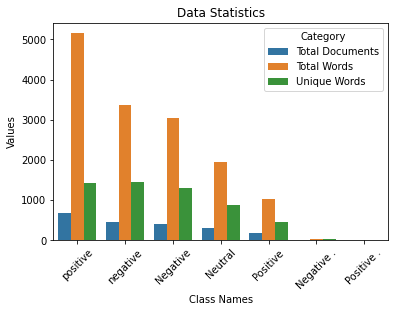

In [129]:
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

### Review Length Distribution

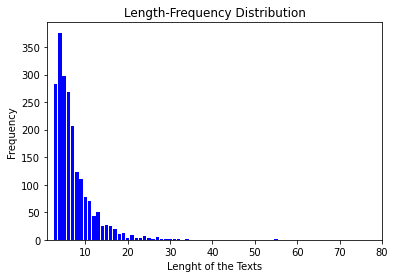

Maximum Length of a review: 55
Minimum Length of a review: 3
Average Length of a reviews: 7.0


In [130]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 80)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

## Feature Extraction Using TF-IDF

In [131]:
from utils import calc_unigram_tfidf,calc_bigram_tfidf,calc_trigram_tfidf,show_tfidf

In [132]:
tweet = 'প্রডাক্ট একদম ঠিকঠাক ছিলো। ধন্যবাদ সেলার ও দারাজকে।'
cv,feature_vector = calc_trigram_tfidf(dataset.cleaned)  
print("Shape of TF-IDF Corpus =====>",feature_vector.shape,'\n')
show_tfidf(cv,tweet)
#first_vector = tfidf.transform([samp_review]).toarray()

Shape of TF-IDF Corpus =====> (2070, 23205) 

Sample Review:  প্রডাক্ট একদম ঠিকঠাক ছিলো। ধন্যবাদ সেলার ও দারাজকে।
                         tfidf
প্রডাক্ট একদম         0.453318
প্রডাক্ট একদম ঠিকঠাক  0.453318
একদম ঠিকঠাক           0.401022
ঠিকঠাক                0.309165
ধন্যবাদ সেলার         0.304772
একদম                  0.289961
প্রডাক্ট              0.255515
সেলার                 0.235426


In [9]:
#help(calc_unigram_tfidf)

## ML Model Development Using Unigram Feature

### Unigram Tf-idf Feature Extraction, Label Encoding and Splitting

In [133]:
from utils import label_encoding,dataset_split
from utils import calc_unigram_tfidf

# calculate the Unigram Tf-idf feature
cv,feature_vector = calc_unigram_tfidf(dataset.cleaned) 
# Encode the labels
lables = label_encoding(dataset.Sentiment,False)
# Split the Feature into train and test set
X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)

Feature Size :======> 3706

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2070 
	Training		 1656 
	Test			 414


### Model Defination

In [62]:
from utils import model_performace,ml_models_for_unigram_tfidf

## classifiers defination
ml_models,model_names = ml_models_for_unigram_tfidf() 

# call model accuracy function and save the metrices into a dictionary
accuracy = {f'{model_names[i]}':model_performace(model,X_train,X_test,y_train,y_test) for i,model in enumerate(ml_models)}
# Save the performance parameter into json file
with open('ml_performance_unigram.json', 'w') as f:
    json.dump(accuracy, f)


c:\users\partha kumar bagchi\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


### Performance Table  

In [63]:
from utils import performance_table

# Load the json file
accuracy = json.load(open('ml_performance_unigram.json'))
table = performance_table(accuracy)
table

,Accuracy,Precision,Recall,F1 Score
LR,85.42,82.86,96.67,89.23
DT,73.96,84.31,71.67,77.48
RF,86.46,88.52,90.00,89.26
MNB,86.46,89.83,88.33,89.08
KNN,86.46,87.30,91.67,89.43
Linear SVM,69.79,67.82,98.33,80.27
RBF SVM,79.17,76.32,96.67,85.29
SGD,85.42,87.10,90.00,88.52


In [64]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")


Highest Accuracy achieved by RF at = 86.46000000000001
Highest F1-Score achieved by KNN at = 89.42999999999999
Highest Precision Score achieved by MNB at = 89.83
Highest Recall Score achieved by Linear SVM at = 98.33


### ROC Curve

c:\users\partha kumar bagchi\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


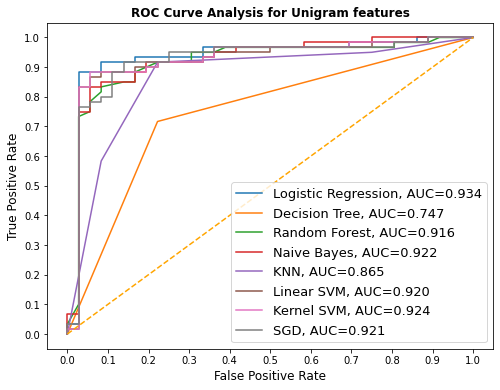

In [65]:
from utils import plot_roc_curve,ml_models_for_unigram_tfidf
## classifiers defination
gram_models = ml_models_for_unigram_tfidf() 

plot_roc_curve(gram_models,X_train,X_test,y_train,y_test,'Unigram')

### Precision-Recall Curve

c:\users\partha kumar bagchi\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


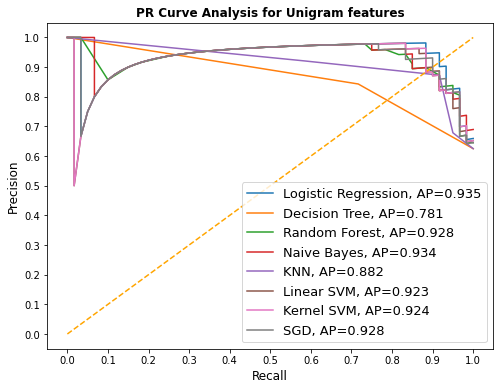

In [66]:
from utils import plot_PR_curve,ml_models_for_unigram_tfidf

gram_models = ml_models_for_unigram_tfidf()

plot_PR_curve(gram_models,X_train,X_test,y_train,y_test,'Unigram')

## Model Development Using Bigram Feature

### Bi-gram Tf-idf Feature Extraction, Label Encoding and Splitting

In [134]:
from utils import label_encoding,dataset_split
from utils import calc_bigram_tfidf

# calculate the Bigram Tf-idf feature
cv,feature_vector = calc_bigram_tfidf(dataset.cleaned) 
# Encode the labels
lables = label_encoding(dataset.Sentiment,False)
# Split the Feature into train and test set
X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)

Feature Size :======> 13456

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2070 
	Training		 1656 
	Test			 414


### Model Defination

In [68]:
from utils import model_performace,ml_models_for_bigram_tfidf
                
# Classifiers Defination
ml_models,model_names = ml_models_for_bigram_tfidf() 

# call model accuracy function and save the metrices into a dictionary
accuracy = {f'{model_names[i]}':model_performace(model,X_train,X_test,y_train,y_test) for i,model in enumerate(ml_models)}
# Save the performance parameter into json file
with open('ml_performance_bigram.json', 'w') as f:
    json.dump(accuracy, f)


c:\users\partha kumar bagchi\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


### Performance Table

In [69]:
from utils import performance_table

# Load the json file
accuracy = json.load(open('ml_performance_bigram.json'))
table = performance_table(accuracy)
table

,Accuracy,Precision,Recall,F1 Score
LR,78.12,75.32,96.67,84.67
DT,76.04,82.46,78.33,80.34
RF,83.33,83.33,91.67,87.30
MNB,84.38,89.47,85.00,87.18
KNN,80.21,90.20,76.67,82.88
Linear SVM,66.67,65.22,100.00,78.95
RBF SVM,66.67,65.22,100.00,78.95
SGD,88.54,87.69,95.00,91.20


In [70]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")


Highest Accuracy achieved by SGD at = 88.53999999999999
Highest F1-Score achieved by SGD at = 91.2
Highest Precision Score achieved by KNN at = 90.2
Highest Recall Score achieved by Linear SVM at = 100.0


### ROC Curve

c:\users\partha kumar bagchi\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


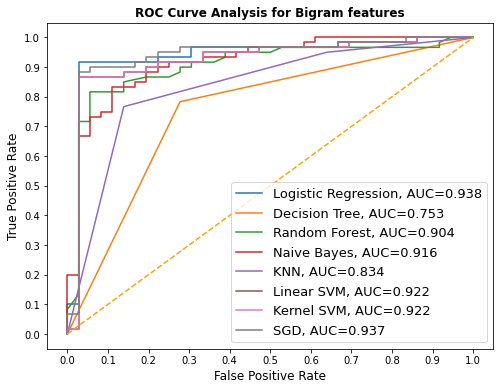

In [71]:
from utils import plot_roc_curve,ml_models_for_bigram_tfidf
## classifiers defination
gram_models = ml_models_for_bigram_tfidf()

plot_roc_curve(gram_models,X_train,X_test,y_train,y_test,'Bigram')

## Precision-Recall Curve

c:\users\partha kumar bagchi\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


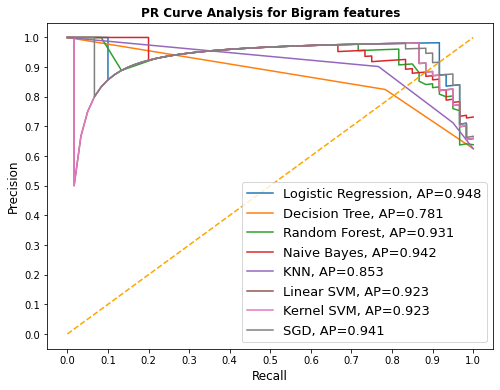

In [72]:
from utils import plot_PR_curve,ml_models_for_bigram_tfidf
## classifiers defination
gram_models = ml_models_for_bigram_tfidf()

plot_PR_curve(gram_models,X_train,X_test,y_train,y_test,'Bigram')

## Model Development Using Tri-gram Feature

### Tri-gram Tf-idf Feature Extraction, Label Encoding and Splitting

In [135]:
from utils import label_encoding,dataset_split
from utils import calc_trigram_tfidf

# calculate the Tri-gram Tf-idf feature
cv,feature_vector = calc_trigram_tfidf(dataset.cleaned) 
# Encode the labels
lables = label_encoding(dataset.Sentiment,False)
# Split the Feature into train and test set
X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)

Feature Size :======> 23205

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2070 
	Training		 1656 
	Test			 414


### Model Defination

In [74]:
from utils import model_performace,ml_models_for_trigram_tfidf
            

# Classifiers Defination
ml_models,model_names = ml_models_for_trigram_tfidf()             

# call model accuracy function and save the metrices into a dictionary
accuracy = {f'{model_names[i]}':model_performace(model,X_train,X_test,y_train,y_test) for i,model in enumerate(ml_models)}
# Save the performance parameter into json file
with open('ml_performance_trigram.json', 'w') as f:
    json.dump(accuracy, f)


c:\users\partha kumar bagchi\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


### Performance Table

In [75]:
from utils import performance_table

# Load the json file
accuracy = json.load(open('ml_performance_trigram.json'))
table = performance_table(accuracy)
table


,Accuracy,Precision,Recall,F1 Score
LR,72.92,70.73,96.67,81.69
DT,69.79,79.25,70.00,74.34
RF,86.46,85.07,95.00,89.76
MNB,84.38,89.47,85.00,87.18
KNN,77.08,89.58,71.67,79.63
Linear SVM,63.54,63.16,100.00,77.42
RBF SVM,66.67,65.22,100.00,78.95
SGD,86.46,85.07,95.00,89.76


In [76]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")


Highest Accuracy achieved by RF at = 86.46000000000001
Highest F1-Score achieved by RF at = 89.75999999999999
Highest Precision Score achieved by KNN at = 89.58
Highest Recall Score achieved by Linear SVM at = 100.0


### ROC Curve

c:\users\partha kumar bagchi\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


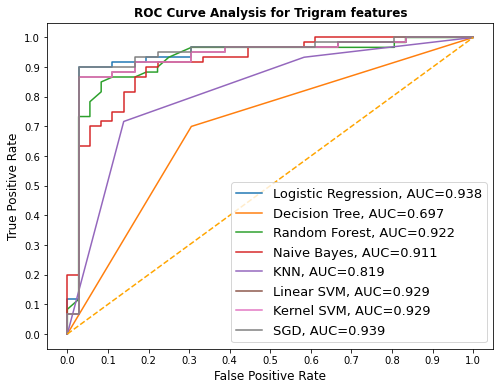

In [77]:
from utils import plot_roc_curve,ml_models_for_trigram_tfidf
## classifiers defination
gram_models = ml_models_for_trigram_tfidf()

plot_roc_curve(gram_models,X_train,X_test,y_train,y_test,'Trigram')

### Precision-Recall

c:\users\partha kumar bagchi\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


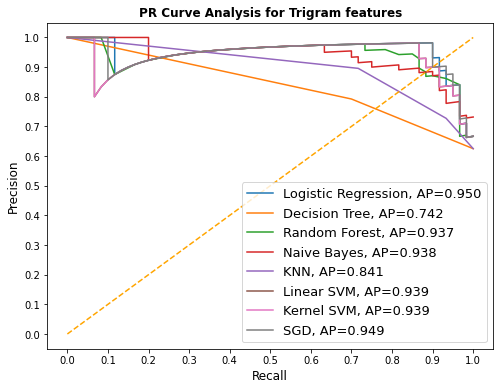

In [78]:
from utils import plot_PR_curve,ml_models_for_trigram_tfidf
## classifiers defination
gram_models = ml_models_for_trigram_tfidf()

plot_PR_curve(gram_models,X_train,X_test,y_train,y_test,'Trigram')

## Final Model

- Selected Feature: Trigram
- Selected Model : Stochastic Gradient Descent

In [136]:
from utils import label_encoding,dataset_split
from utils import calc_unigram_tfidf

# calculate the Tri-gram Tf-idf feature
cv,feature_vector = calc_trigram_tfidf(dataset.cleaned) 
# Encode the labels
lables = label_encoding(dataset.Sentiment,False)
# Split the Feature into train and test set
X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)

Feature Size :======> 23205

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2070 
	Training		 1656 
	Test			 414


### Saved the model for reuse again

In [81]:
import pickle
# open a file, where you ant to store the data
file = open('rr_review_sgd.pkl', 'wb')

# dump information to that file
pickle.dump(sgd_model, file)

In [82]:
model = open('rr_review_sgd.pkl','rb')
sgd = pickle.load(model)

In [83]:
y_pred = sgd.predict(X_test)
accuracy_score(y_test,y_pred)

0.8645833333333334

## Check a Review Sentiment using our model

In [90]:
# load the model
model = open('rr_review_sgd.pkl','rb')
sgd = pickle.load(model)
######
#review = 'aaaasd asd asdasd asd'
review = 'প্রডাক্ট একদম ঠিকঠাক ছিলো। ধন্যবাদ সেলার ও দারাজকে।'
# Process the reviews
processed_review = process_reviews(review,stopwords = stopwords_list,removing_stopwords = True)
if (len(processed_review))>0:
    # calculate the Unigram Tf-idf feature
    cv,feature_vector = calc_trigram_tfidf(dataset.cleaned) 
    feature = cv.transform([processed_review]).toarray()

    sentiment = sgd.predict(feature)
    score = round(max(sgd.predict_proba(feature).reshape(-1)),2)*100

    if (sentiment ==0):
        print(f"It is a Negative Review and the probability is {score}%")
    else:
        print(f"It is a Positive Review and the probability is {score}%")
else:
    print("This review doesn't contains any bengali Words, thus cannot predict the Sentiment.")


It is a Positive Review and the probability is 98.0%


In [91]:
# load the model
model = open('rr_review_sgd.pkl','rb')
sgd = pickle.load(model)
######
#review = 'aaaasd asd asdasd asd'
review = 'একটু আগে প্রোডাক্ট হাতে পাইলাম কিন্তু লাইটগুলা জ্বলে না। '
# Process the reviews
processed_review = process_reviews(review,stopwords = stopwords_list,removing_stopwords = True)
if (len(processed_review))>0:
    # calculate the Unigram Tf-idf feature
    cv,feature_vector = calc_trigram_tfidf(dataset.cleaned) 
    feature = cv.transform([processed_review]).toarray()

    sentiment = sgd.predict(feature)
    score = round(max(sgd.predict_proba(feature).reshape(-1)),2)*100

    if (sentiment ==0):
        print(f"It is a Negative Review and the probability is {score}%")
    else:
        print(f"It is a Positive Review and the probability is {score}%")
else:
    print("This review doesn't contains any bengali Words, thus cannot predict the Sentiment.")


It is a Negative Review and the probability is 93.0%
